#Setting Colab

In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
downloaded = drive.CreateFile({'id':"1He8sL6OFsI5gvYL7NB1hvfb0Imj4BTRV"})   # replace the id with id of file you want to access
downloaded.GetContentFile('student-mat.csv')        # replace the file name with your file
downloaded = drive.CreateFile({'id':"16fUtkFe-lxb99txrLBjJANNtefjgb8l-"}) 
downloaded.GetContentFile('student-por.csv') 

# Import libraly

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm
from scipy.stats import skew
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

Import Data

In [6]:
pd.set_option('display.max_columns', 100)

In [7]:
student_por = pd.read_csv('student-por.csv') 
data=student_por

# Clean Data

In [8]:
#student-por.csv is data for Mathematics course.
student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [9]:
#Check missing values
student_por.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [11]:
data = student_por
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [12]:
#find duplicate row
data[data.duplicated()==True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [13]:
data.shape

(649, 33)

In [14]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [15]:
#sum unique value of each column
data.nunique()

school         2
sex            2
age            8
address        2
famsize        2
Pstatus        2
Medu           5
Fedu           5
Mjob           5
Fjob           5
reason         4
guardian       3
traveltime     4
studytime      4
failures       4
schoolsup      2
famsup         2
paid           2
activities     2
nursery        2
higher         2
internet       2
romantic       2
famrel         5
freetime       5
goout          5
Dalc           5
Walc           5
health         5
absences      24
G1            17
G2            16
G3            17
dtype: int64

Response is the variable we need to predict. So let's do some analysis on this variable first.

In [16]:
data.G3

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

In [17]:
grades = {16: 'A',11: 'B',6: 'C',0: 'D'}
def grade_mapping(value):
    for key, letter in grades.items():
        if value >= key:
            return letter

In [18]:
data['grade']=data['G3'].apply(grade_mapping)
data=data.drop(columns='G3', axis=1)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,B
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,C
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,A
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,C
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,C


In [19]:
data.grade

0      B
1      B
2      B
3      B
4      B
      ..
644    C
645    A
646    C
647    C
648    B
Name: grade, Length: 649, dtype: object

In [20]:
#Deal with category and numerical variable
if [col for col in data.columns if len(data[col].unique()) == 2]:
    bi_var = [col for col in data.columns if len(data[col].unique()) == 2]
if [col for col in data.columns if len(data[col].unique()) >2]:
    all_num = [col for col in data.columns if len(data[col].unique()) >2]
if [col for col in data.columns if len(data[col].unique()) >5]:
    num_var = [col for col in data.columns if len(data[col].unique()) >5]

In [21]:
bi_var

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [22]:
all_num

['age',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'grade']

In [23]:
num_var

['age', 'absences', 'G1', 'G2']

In [24]:
nom_or = list(set(all_num) - set(num_var))

In [25]:
nom_or

['Fjob',
 'Fedu',
 'reason',
 'Mjob',
 'guardian',
 'failures',
 'Dalc',
 'Walc',
 'studytime',
 'goout',
 'traveltime',
 'health',
 'famrel',
 'grade',
 'freetime',
 'Medu']

In [26]:
nominal = ['Medu','Fedu','Mjob','Fjob','reason','guardian']

In [27]:
nominal

['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian']

In [28]:
ordinal = list(set(nom_or) - set(nominal))

In [29]:
ordinal

['traveltime',
 'health',
 'grade',
 'Walc',
 'failures',
 'Dalc',
 'freetime',
 'studytime',
 'famrel',
 'goout']

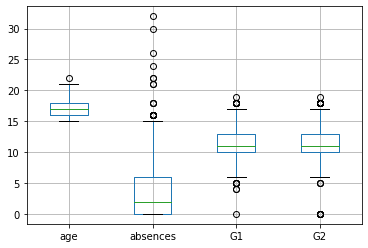

In [30]:
data[num_var].boxplot()

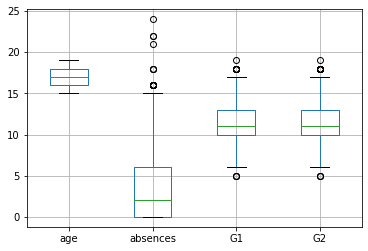

In [31]:
#drop outliners
data = data.drop(data[data.absences >25].index)
data = data.drop(data[data.G1 == 0].index)
data = data.drop(data[data.G2 == 0].index)
data = data.drop(data[data.age >= 20].index)
data = data.drop(data[data.G1 < 5].index)
data[num_var].boxplot()

# <h1> EDA </h1>

In [32]:
data.grade.value_counts()

B    364
C    174
A     81
D      9
Name: grade, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Student')

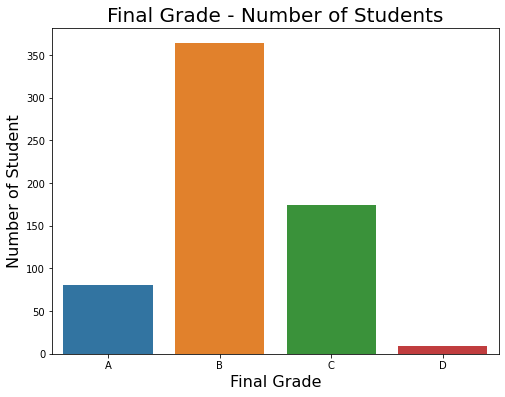

In [33]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(data.grade ,order=["A","B","C","D"])
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

Text(0.5, 1.0, 'Correlation Heatmap')

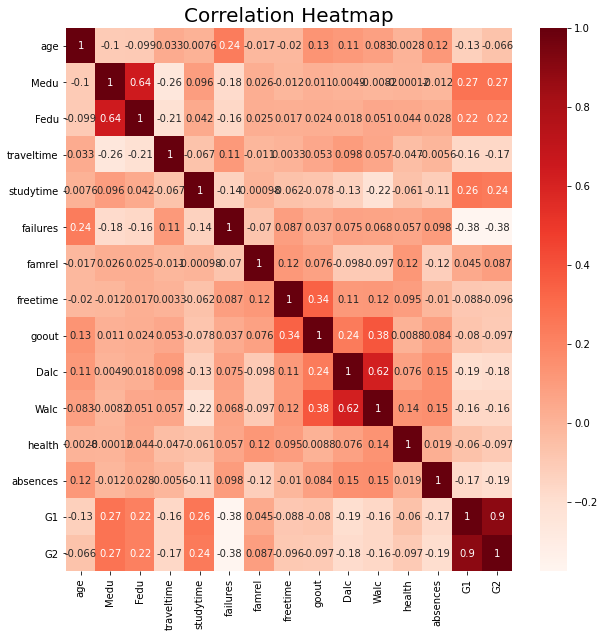

In [34]:
# see correlation between variables through a correlation heatmap
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [35]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['A','B','C','D']
romance_tab1 = pd.crosstab(index=data.grade, columns=data.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc)

<Figure size 432x288 with 0 Axes>

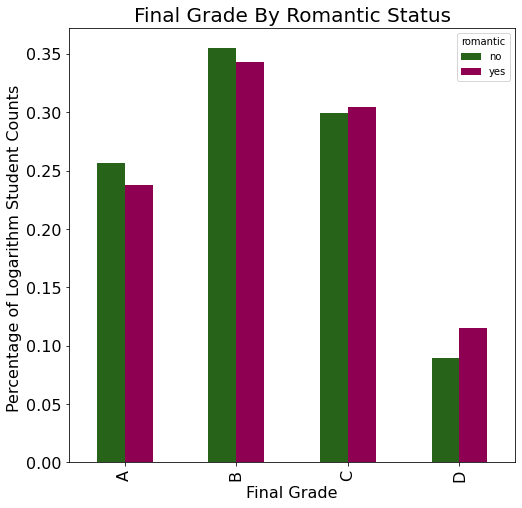

In [36]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [37]:
# chi-square test result -- significant!
import statsmodels.api as sm
romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.211166099383032

In [38]:
# address
perc = (lambda col: col/col.sum())
index = ['A','B','C','D']
address_tab1 = pd.crosstab(index=data.grade, columns=data.address)
address_tab = np.log(address_tab1)
address_perc = address_tab.apply(perc)

<Figure size 432x288 with 0 Axes>

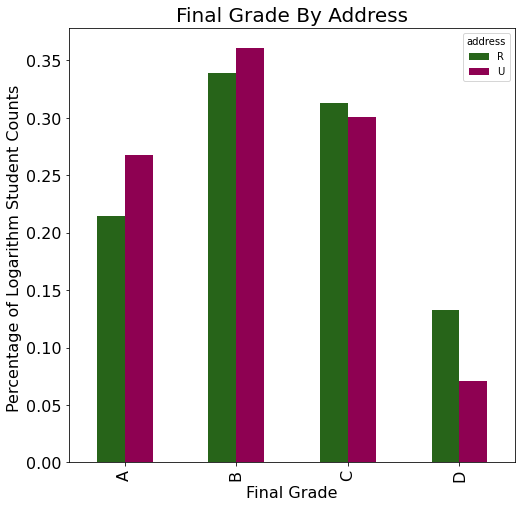

In [39]:
plt.figure()
address_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Address', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [40]:
# chi-square test result -- significant!
import statsmodels.api as sm
address_table = sm.stats.Table(address_tab1)
address_rslt = address_table.test_nominal_association()
address_rslt.pvalue

0.0007619809150921641

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

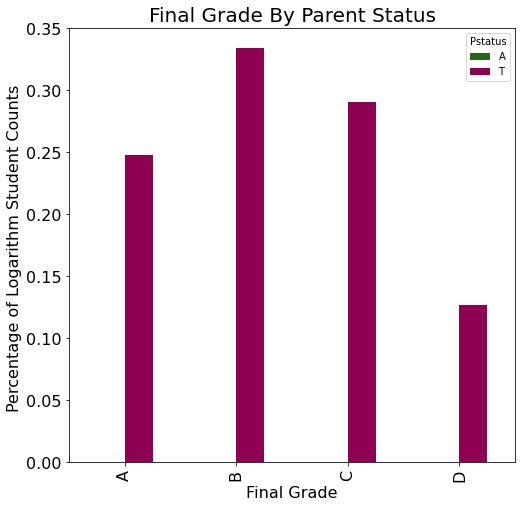

P-values : 


0.9059677159052015

In [41]:
perc = (lambda col: col/col.sum())
index = ['A','B','C','D']
Pstatus_tab1 = pd.crosstab(index=data.grade, columns=data.Pstatus)
Pstatus_tab = np.log(Pstatus_tab1)
Pstatus_perc = Pstatus_tab.apply(perc)

plt.figure()
Pstatus_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Parent Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
Pstatus_table = sm.stats.Table(Pstatus_tab1)
Pstatus_rslt = Pstatus_table.test_nominal_association()
Pstatus_rslt.pvalue

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

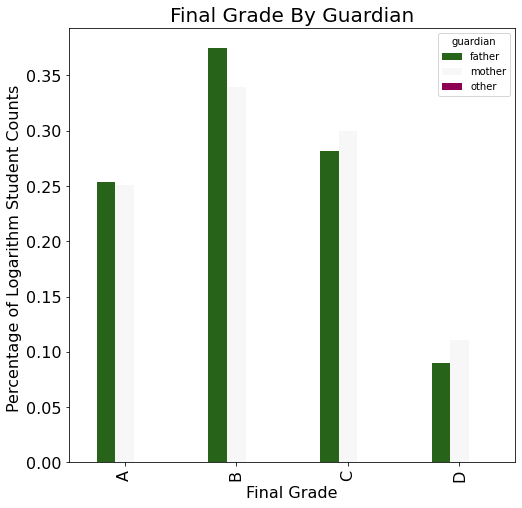

P-values : 


0.1330284145932108

In [42]:
perc = (lambda col: col/col.sum())
index = ['A','B','C','D']
guardian_tab1 = pd.crosstab(index=data.grade, columns=data.guardian)
guardian_tab = np.log(guardian_tab1)
guardian_perc = guardian_tab.apply(perc)

plt.figure()
guardian_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Guardian', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
guardian_table = sm.stats.Table(guardian_tab1)
guardian_rslt = guardian_table.test_nominal_association()
guardian_rslt.pvalue

<Figure size 432x288 with 0 Axes>

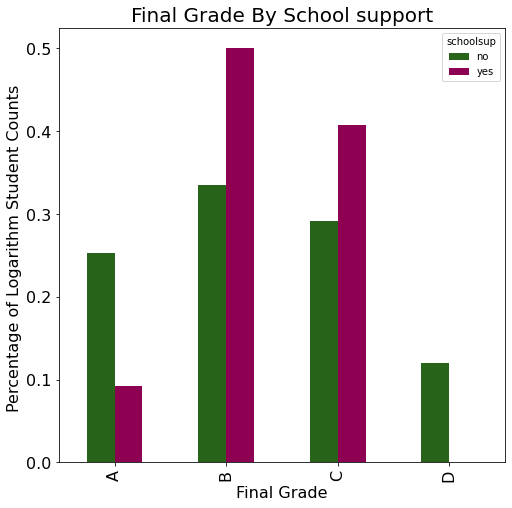

P-values : 


0.09242976106194645

In [43]:
perc = (lambda col: col/col.sum())
index = ['A','B','C','D']
schoolsup_tab1 = pd.crosstab(index=data.grade, columns=data.schoolsup)
schoolsup_tab = np.log(schoolsup_tab1)
schoolsup_perc = schoolsup_tab.apply(perc)

plt.figure()
schoolsup_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By School support', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
schoolsup_table = sm.stats.Table(schoolsup_tab1)
schoolsup_rslt = schoolsup_table.test_nominal_association()
schoolsup_rslt.pvalue

<Figure size 432x288 with 0 Axes>

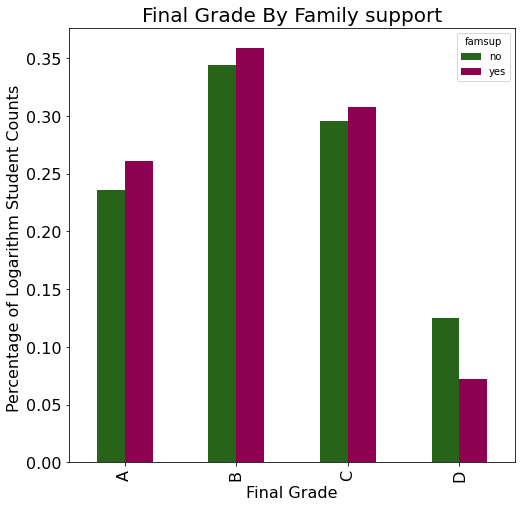

P-values : 


0.3271283628549685

In [44]:
perc = (lambda col: col/col.sum())
index = ['A','B','C','D']
famsup_tab1 = pd.crosstab(index=data.grade, columns=data.famsup)
famsup_tab = np.log(famsup_tab1)
famsup_perc = famsup_tab.apply(perc)

plt.figure()
famsup_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Family support', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
famsup_table = sm.stats.Table(famsup_tab1)
famsup_rslt = famsup_table.test_nominal_association()
famsup_rslt.pvalue

<Figure size 432x288 with 0 Axes>

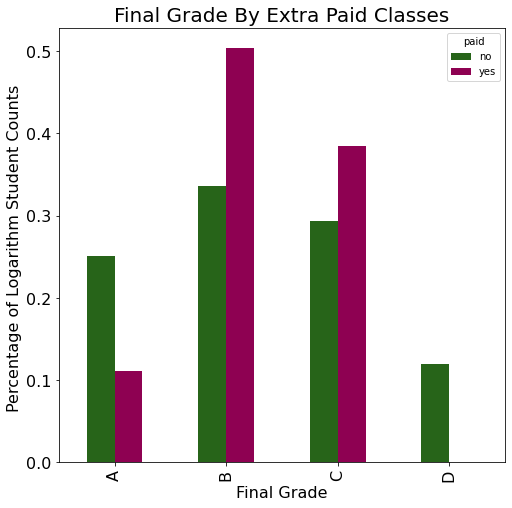

P-values : 


0.5065671021621274

In [45]:
paid_tab1 = pd.crosstab(index=data.grade, columns=data.paid)
paid_tab = np.log(paid_tab1)
paid_perc = paid_tab.apply(perc)

plt.figure()
paid_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Extra Paid Classes', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
paid_table = sm.stats.Table(paid_tab1)
paid_rslt = paid_table.test_nominal_association()
paid_rslt.pvalue

<Figure size 432x288 with 0 Axes>

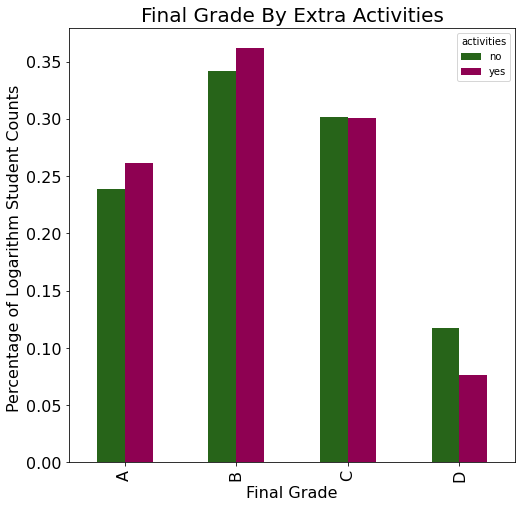

P-values : 


0.2935442279165237

In [46]:
activities_tab1 = pd.crosstab(index=data.grade, columns=data.activities)
activities_tab = np.log(activities_tab1)
activities_perc = activities_tab.apply(perc)

plt.figure()
activities_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Extra Activities', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
activities_table = sm.stats.Table(activities_tab1)
activities_rslt = activities_table.test_nominal_association()
activities_rslt.pvalue

<Figure size 432x288 with 0 Axes>

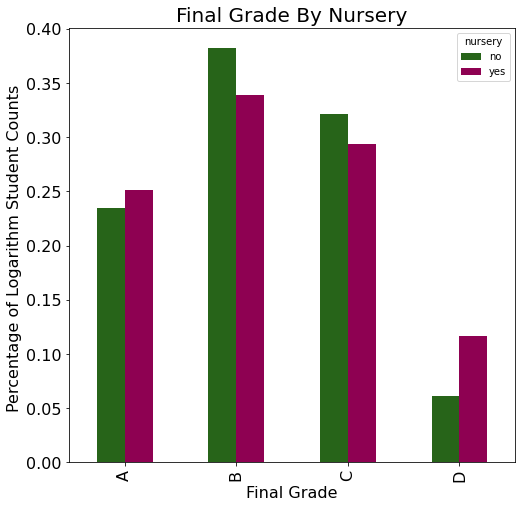

P-values : 


0.9026270479709089

In [47]:
nursery_tab1 = pd.crosstab(index=data.grade, columns=data.nursery)
nursery_tab = np.log(nursery_tab1)
nursery_perc = nursery_tab.apply(perc)

plt.figure()
nursery_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Nursery', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
nursery_table = sm.stats.Table(nursery_tab1)
nursery_rslt = nursery_table.test_nominal_association()
nursery_rslt.pvalue

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<Figure size 432x288 with 0 Axes>

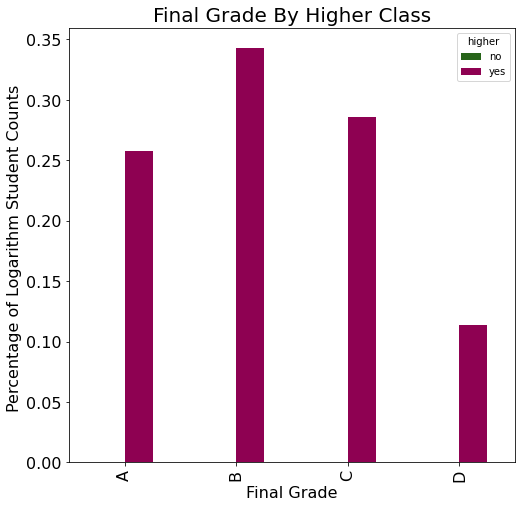

P-values : 


1.467714838554457e-13

In [48]:
higher_tab1 = pd.crosstab(index=data.grade, columns=data.higher)
higher_tab = np.log(higher_tab1)
higher_perc = higher_tab.apply(perc)

plt.figure()
higher_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Higher Class', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab1)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

<Figure size 432x288 with 0 Axes>

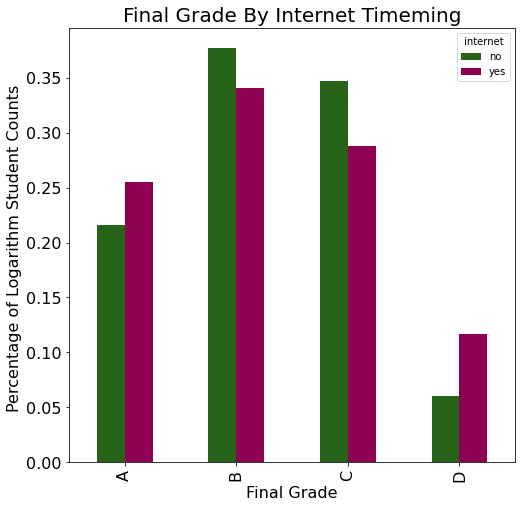

P-values : 


0.015780803550182743

In [49]:
internet_tab1 = pd.crosstab(index=data.grade, columns=data.internet)
internet_tab = np.log(internet_tab1)
internet_perc = internet_tab.apply(perc)

plt.figure()
internet_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Internet Timeming', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

print('P-values : ')
# chi-square test result -- significant!
import statsmodels.api as sm
internet_table = sm.stats.Table(internet_tab1)
internet_rslt = internet_table.test_nominal_association()
internet_rslt.pvalue





# Dummy and label encoding


In [50]:
onehot = bi_var + nominal

In [51]:
#Get dummy variable
one_hot= pd.get_dummies(data[onehot], drop_first = True)
one_hot.head()

,Medu,Fedu,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,1,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,4,2,0,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0
4,3,3,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
5,4,3,0,1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0


In [52]:
data_prep=pd.concat([one_hot,data[ordinal]],axis=1)
data_prep.head()

,Medu,Fedu,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,traveltime,health,grade,Walc,failures,Dalc,freetime,studytime,famrel,goout
1,1,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3,B,1,0,1,3,2,5,3
2,1,1,0,0,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,3,B,3,0,2,3,2,4,2
3,4,2,0,0,1,0,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,5,B,1,0,1,2,3,3,2
4,3,3,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,5,B,2,0,1,3,2,4,2
5,4,3,0,1,1,1,1,0,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,5,B,2,0,1,4,2,5,2


In [53]:

# Getting the target variable
y = data_prep['grade']
# Getting the input variables
X = data_prep.drop(['grade'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Feature selection
https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/

### Use Chi-squared Feature Selection

https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [54]:
chi_scores = chi2(X,y)

In [55]:
chi_scores

(array([2.30695784e+01, 1.55314421e+01, 3.57614923e+01, 4.51095003e+00,
        5.06840417e+00, 1.29759745e+00, 1.67630242e-01, 5.75499866e+00,
        1.31348724e+00, 2.19386748e+00, 1.93015299e+00, 1.14927423e-01,
        6.13979248e+00, 2.37428959e+00, 2.89584655e+00, 4.83633954e+00,
        6.01820682e+00, 2.12170914e+00, 1.70490515e+01, 4.32561558e+00,
        2.39956559e+00, 3.13155657e+00, 1.36579222e+01, 5.52785496e+00,
        9.98408624e+00, 1.30330324e+01, 8.08561691e-01, 6.39587615e+00,
        4.22584188e+00, 1.99145388e+00, 9.38096003e+00, 1.79803050e+02,
        7.62078987e+00, 3.41913411e+00, 1.04845225e+01, 6.64813089e-01,
        1.66582857e+00]),
 array([3.90566770e-05, 1.41446966e-03, 8.41027094e-08, 2.11315647e-01,
        1.66856236e-01, 7.29703665e-01, 9.82637512e-01, 1.24157902e-01,
        7.25932916e-01, 5.33157296e-01, 5.87029506e-01, 9.89987792e-01,
        1.05003592e-01, 4.98438551e-01, 4.07963916e-01, 1.84180988e-01,
        1.10727776e-01, 5.47533357e-01

In [56]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

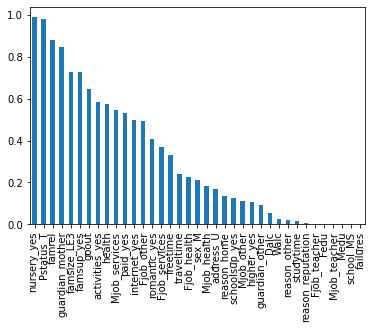

In [57]:
p_values.plot.bar()

In [58]:
# fs = SelectKBest(score_func=chi2, k=18)
# fs.fit(X, y)

# X_fs = fs.transform(X)

In [59]:
# what are scores for the features
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
# pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()

In [60]:
#This returns a boolean array mapping the selection of each feature.

# print(X_fs.columns[model.get_support()])

### Use Extra Trees Classifier

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [62]:
# Building the model 
extra_tree_forest = ExtraTreesClassifier()

In [63]:
# Training the model 
extra_tree_forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [64]:
# Computing the importance of each feature 
feature_importance = extra_tree_forest.feature_importances_ 
feature_importance

array([0.04599034, 0.04530404, 0.03733859, 0.02903377, 0.02543922,
       0.0261483 , 0.01911755, 0.01856969, 0.02984733, 0.00888801,
       0.02756382, 0.02211905, 0.03603115, 0.02371883, 0.02842181,
       0.0132251 , 0.0258967 , 0.01862373, 0.01181471, 0.00640638,
       0.02075608, 0.0195486 , 0.00771673, 0.02054657, 0.01620589,
       0.02122971, 0.0266623 , 0.00810872, 0.03205012, 0.03856461,
       0.04430801, 0.05465499, 0.02539681, 0.04419695, 0.03857105,
       0.04138445, 0.04060027])

In [65]:
model = SelectFromModel(extra_tree_forest, prefit=True)
X_new = model.transform(X)
X_new

array([[1, 1, 0, ..., 2, 5, 3],
       [1, 1, 0, ..., 2, 4, 2],
       [4, 2, 0, ..., 3, 3, 2],
       ...,
       [1, 1, 1, ..., 2, 1, 1],
       [3, 1, 1, ..., 1, 2, 5],
       [3, 2, 1, ..., 1, 4, 1]])

In [66]:
X_new.shape   

(628, 16)

In [67]:
#This returns a boolean array mapping the selection of each feature.
print(X.columns[model.get_support()])

Index(['Medu', 'Fedu', 'school_MS', 'sex_M', 'famsup_yes', 'activities_yes',
       'higher_yes', 'romantic_yes', 'traveltime', 'health', 'Walc',
       'failures', 'freetime', 'studytime', 'famrel', 'goout'],
      dtype='object')


In [68]:
Xreduce_col=X.columns[model.get_support()]

In [69]:
Xreduce=data_prep[Xreduce_col]
Xreduce

,Medu,Fedu,school_MS,sex_M,famsup_yes,activities_yes,higher_yes,romantic_yes,traveltime,health,Walc,failures,freetime,studytime,famrel,goout
1,1,1,0,0,1,0,1,0,1,3,1,0,3,2,5,3
2,1,1,0,0,0,0,1,0,1,3,3,0,3,2,4,2
3,4,2,0,0,1,1,1,1,1,5,1,0,2,3,3,2
4,3,3,0,0,1,0,1,0,1,5,2,0,3,2,4,2
5,4,3,0,1,1,1,1,0,1,5,2,0,4,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,2,3,1,0,0,1,1,0,1,5,2,1,4,3,5,2
645,3,1,1,0,1,0,1,0,1,1,1,0,3,2,4,4
646,1,1,1,0,0,1,1,0,2,5,1,0,1,2,1,1
647,3,1,1,1,0,0,1,0,2,2,4,0,4,1,2,5


In [70]:
# Normalizing the individual importances 
# feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
#                                         extra_tree_forest.estimators_], 
#                                         axis = 0) 

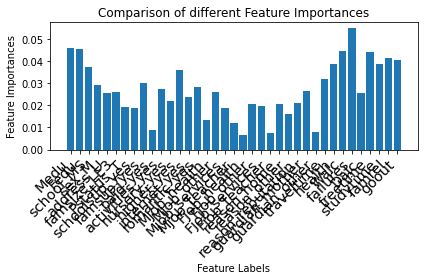

In [71]:
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
# Plotting a Bar Graph to compare the models 
plt.bar(X.columns, feature_importance) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.tight_layout()

In [72]:
Xreduce_train, Xreduce_test, yreduce_train, yreduce_test = train_test_split(Xreduce, y, test_size=0.3, random_state=42)

# <h1> Build  model without hyperparameter </h1>

First, run the algorithms with the default parameters to get an idea about their performances on our data and then we would tune the parameters of better performing algorithms to improve their performances.

In [73]:
from sklearn import svm

In [74]:
various_model={'Decision Tree': DecisionTreeClassifier(),
               'Logistic Regression': LogisticRegression(),
               'SVC': svm.SVC(),
               'XGBoost' : XGBClassifier(),
               'AdaBoost': AdaBoostClassifier()}

In [75]:
acc_without_tuning = []
for key,value in various_model.items():
  model=value
  model.fit(X_train,y_train)
  predict=model.predict(X_test)
  print('Result of : '+ str(key) +'\n')
  # print(confusion_matrix(y_test,predict))
  # print(classification_report(y1_test,predict))
  accuracy=accuracy_score(y_test,predict)
  print("accuracy = "+str(accuracy)+ '\n')
  # acc_without_tuning[key] = str(model)
  acc_without_tuning.append(accuracy)

Result of : Decision Tree

accuracy = 0.49206349206349204

Result of : Logistic Regression

accuracy = 0.6587301587301587

Result of : SVC

accuracy = 0.6984126984126984



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Result of : XGBoost

accuracy = 0.7142857142857143

Result of : AdaBoost

accuracy = 0.46825396825396826



In [76]:
acc_without_tuning

[0.49206349206349204,
 0.6587301587301587,
 0.6984126984126984,
 0.7142857142857143,
 0.46825396825396826]

In [77]:
base_Decision_Tree = acc_without_tuning[0] *100
base_Logistic_Regression = acc_without_tuning[1] *100
base_SVC = acc_without_tuning[2] *100
base_XGBoost = acc_without_tuning[3] *100
base_AdaBoost = acc_without_tuning[4] *100

In [78]:
# print('Accuracy of Decision Tree with out Hyperparameters : ', base_Decision_Tree)
# print('Accuracy of Random Forest with out Hyperparameters : ', base_Random_Forest)
# print('Accuracy of Logistic Regression with out Hyperparameters : ', base_Logistic_Regression)
# print('Accuracy of SVC with out Hyperparameters : ', base_SVC)
# print('Accuracy of XGBoost with out Hyperparameters : ',base_XGBoost)
# print('Accuracy of AdaBoost with out Hyperparameters : ', base_AdaBoost)

In [79]:
print('Accuracy of Decision Tree with out Hyperparameters : ', base_Decision_Tree)
print('Accuracy of Logistic Regression with out Hyperparameters : ', base_Logistic_Regression)
print('Accuracy of SVC with out Hyperparameters : ', base_SVC)
print('Accuracy of XGBoost with out Hyperparameters : ',base_XGBoost)
print('Accuracy of AdaBoost with out Hyperparameters : ', base_AdaBoost)

Accuracy of Decision Tree with out Hyperparameters :  49.2063492063492
Accuracy of Logistic Regression with out Hyperparameters :  65.87301587301587
Accuracy of SVC with out Hyperparameters :  69.84126984126983
Accuracy of XGBoost with out Hyperparameters :  71.42857142857143
Accuracy of AdaBoost with out Hyperparameters :  46.82539682539682


# Tuning the Model with Hyper-Parameters

#Decision tree classification


In [80]:
# Create a Decision tree Classifier and fit without hyperparameter
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [81]:
y_pred = decision_tree.predict(X_test)

In [82]:
base_decision_tree = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Decision Tree model : ', base_decision_tree )

Accuracy of Decision Tree model :  42.86


In [83]:
# Hyperparameter Optimization
parameters = {'max_features': [5,10,15,20,25], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [50, 100,150],
              'min_samples_leaf': [5, 10,15,20]
             }

In [84]:
#setting K-fold crossvalidation
cv=KFold(n_splits=5,shuffle=True,random_state=20)

In [85]:
# Run the grid search
grid_search = GridSearchCV(decision_tree, parameters,cv=cv, scoring='accuracy')
grid_search = grid_search.fit(X_train, y_train)

In [86]:
grid_search.best_score_

0.6655049504950494

In [87]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 50}

In [88]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
# Set the decision to the best combination of parameters
new_decision_tree = grid_search.best_estimator_

In [90]:
#new_decision_tree1 = grid_search.best_estimator_

In [91]:
# Train the model using the training sets 
new_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
#new_decision_tree1.fit(X1_train,y1_train)

In [93]:
# Prediction on test data
#y_pred = new_decision_tree.predict(X_test)

In [94]:
y_pred = new_decision_tree.predict(X_test)

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        14
           B       0.74      0.89      0.81        80
           C       0.67      0.62      0.65        32

    accuracy                           0.72       126
   macro avg       0.47      0.50      0.48       126
weighted avg       0.64      0.72      0.68       126



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# # Calculating the accuracy
# acc_decision_tree = round( metrics.accuracy_score(y1_test, y_pred1) * 100 , 2 )
# print( 'Accuracy of Decision Tree model : ', acc_decision_tree )

In [97]:
acc_decision_tree = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Decision Tree model : ', acc_decision_tree)

Accuracy of Decision Tree model :  72.22


In [98]:
#Plot a decision tree
import graphviz
from six import StringIO

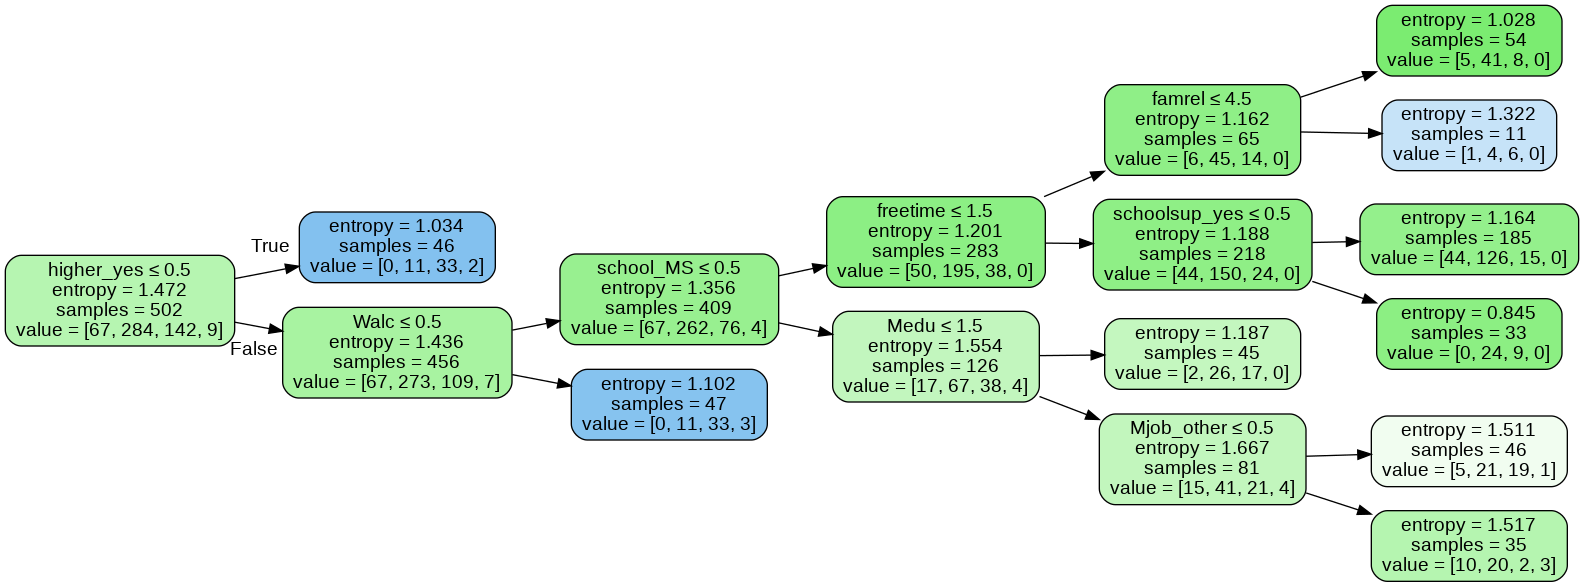

In [99]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(new_decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=data_prep.columns[:-1])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_png('tree.png')
Image(graph.create_png())

# logistic regression classification

Logistic regression does not really have any critical hyperparameters to tune.


In [100]:
# logis_regress=LogisticRegression(multi_class='multinomial',
#                                  solver='lbfgs',fit_intercept=True)
# newton-cg

In [101]:
# logis_regress.get_params

In [102]:
 logis_regress=LogisticRegression()

In [103]:
param_grid = {'C': [0.01, 0.1, 1, 2, 10, 100],
                  'penalty': ['l1','l2']
              }

In [104]:
 #Gridsearch
gridsearch = GridSearchCV(logis_regress, param_grid,cv=cv,scoring='accuracy')
gridsearch.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 2, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [105]:
# gridsearch = GridSearchCV(estimator = LogisticRegression(),
#                     param_grid = param_grid, cv = 5,
#                      n_jobs = -1, verbose = True,
#                      return_train_score = True,
#                      scoring='accuracy')
# gridsearch.fit(X_train, y_train)

In [106]:
#Get best hyperparameters
gridsearch.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [107]:
gridsearch.best_score_

0.6376831683168317

In [108]:
gridsearch.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [109]:
# Set the logistic regression to the best combination of parameters
new_logistic_regression = gridsearch.best_estimator_

In [110]:
# Train the model using the training sets 
new_logistic_regression.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
# Prediction on test data
y_pred = new_logistic_regression.predict(X_test)

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.33      0.07      0.12        14
           B       0.72      0.90      0.80        80
           C       0.65      0.47      0.55        32

    accuracy                           0.70       126
   macro avg       0.57      0.48      0.49       126
weighted avg       0.66      0.70      0.66       126



In [113]:
# Calculating the accuracy
acc_logistic_regression = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logistic_regression )

Accuracy of Logistic Regression model :  69.84


# Support vector machine

In [114]:
#Feature Scaling
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
# scale = StandardScaler().fit
# X = scale.fit_transform(X_train)

In [115]:
# svc_clf = SVC(kernel="rbf", gamma="auto", C=1, max_iter=-1).fit(X_train_scaled, y_train)

In [116]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [117]:
from sklearn import svm
svm=svm.SVC(decision_function_shape='ovo')

In [118]:
parameters= {'kernel' : ['poly', 'rbf', 'sigmoid'],
                  'C' : [50, 10, 1.0, 0.1, 0.01],
                  'gamma' : [0.001, 0.01, 0.1, 1, 10]}

In [119]:
# Run the grid search
grid_search = GridSearchCV(svm, parameters,cv=cv , scoring='accuracy')
grid_search = grid_search.fit(X_train, y_train)

In [120]:
#Get best hyperparameters
grid_search.best_params_

{'C': 1.0, 'gamma': 0.01, 'kernel': 'sigmoid'}

In [121]:
grid_search.best_score_

0.6416237623762375

In [122]:
grid_search.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
new_svc = grid_search.best_estimator_

In [124]:
new_svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.01, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
y_pred = new_svc.predict(X_test)

In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        14
           B       0.70      0.94      0.80        80
           C       0.74      0.44      0.55        32

    accuracy                           0.71       126
   macro avg       0.48      0.46      0.45       126
weighted avg       0.63      0.71      0.65       126



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [127]:
# Calculating the accuracy
acc_svc = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Support Vector Machine model : ', acc_svc )

Accuracy of Support Vector Machine model :  70.63


# SVC with OVR

In [128]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.utils.testing import assert_equal

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [129]:
# Make it an OvR classifier
ovr_classifier = OneVsRestClassifier(new_svc)

In [130]:
# Fit the data to the OvR classifier
ovr_classifier = ovr_classifier.fit(X_train, y_train)

In [131]:
y_pred_ovr = ovr_classifier.predict(X_test)

In [132]:
# Calculating the accuracy
acc_svc_ovr = round( metrics.accuracy_score(y_test, y_pred_ovr) * 100 , 2 )
print( 'Accuracy of Support Vector Machine model : ', acc_svc_ovr )

Accuracy of Support Vector Machine model :  70.63


# Gradient Boosting

In [133]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [134]:
xgb_grid={'max_depth' :[2, 3, 4 ,10],
            'learning_Rate' : [0.01, 0.1, 1],
            'n_estimators' : [30, 50, 100, 150],
            'objective':['multi:softmax']}
extra = {'num_class': [4]}
xgb_grid.update(extra)

In [135]:
#Gridsearch
gridsearch = GridSearchCV(xgb, xgb_grid ,cv=cv,scoring='accuracy',n_jobs=-1)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     ran..., reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_Rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 10],
                

In [136]:
gridsearch.best_score_

0.6476633663366336

In [137]:
gridsearch.best_params_

{'learning_Rate': 0.01,
 'max_depth': 3,
 'n_estimators': 30,
 'num_class': 4,
 'objective': 'multi:softmax'}

In [138]:
gridsearch.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_Rate=0.01, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=30,
              n_jobs=1, nthread=None, num_class=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [139]:
# Set the new_xgb to the best combination of parameters
new_xgb = gridsearch.best_estimator_

In [140]:
# Train the model using the training sets 
new_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_Rate=0.01, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=30,
              n_jobs=1, nthread=None, num_class=4, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [141]:
# Prediction on test data
y_pred = new_xgb.predict(X_test)

In [142]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        14
           B       0.73      0.93      0.81        80
           C       0.75      0.56      0.64        32

    accuracy                           0.73       126
   macro avg       0.49      0.50      0.49       126
weighted avg       0.65      0.73      0.68       126



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


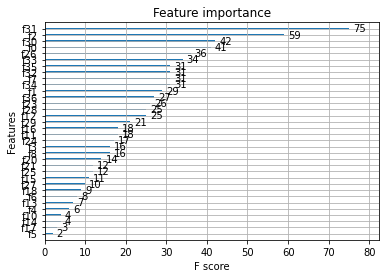

In [143]:
from xgboost import plot_importance
plot_importance(new_xgb)
plt.rcParams['figure.figsize']=(10,5)
plt.show()

In [144]:
# Calculating the accuracy
acc_xgb = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Xgboost model : ', acc_xgb )

Accuracy of Xgboost model :  73.02


## OVR

In [145]:
# Make it an OvR classifier
ovr_classifier = OneVsRestClassifier(new_xgb)

In [146]:
ovr_classifier = ovr_classifier.fit(X_train, y_train)

In [147]:
y_pred_ovr = ovr_classifier.predict(X_test)

In [148]:
# Calculating the accuracy
acc_xgb_ovr = round( metrics.accuracy_score(y_test, y_pred_ovr) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_xgb_ovr )

Accuracy of Random Forest model :  73.02


# AdaBoost

In [149]:
# Instantiate
AdaBoost = AdaBoostClassifier()

In [150]:
search_grid={'n_estimators':[10,20,30,40,50],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=AdaBoost,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=cv)

In [151]:
search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [152]:
search.best_score_

0.6357227722772277

In [153]:
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 10}

In [154]:
search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=10, random_state=None)

In [155]:
new_AdaBoost = search.best_estimator_

In [156]:
new_AdaBoost.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                   learning_rate=0.001, n_estimators=10, random_state=None)

In [157]:
# Prediction on test data
y_pred = new_AdaBoost.predict(X_test)

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        14
           B       0.72      0.96      0.82        80
           C       0.84      0.50      0.63        32

    accuracy                           0.74       126
   macro avg       0.52      0.49      0.48       126
weighted avg       0.67      0.74      0.68       126



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [159]:
# Calculating the accuracy
acc_AdaBoost = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_AdaBoost )

Accuracy of Random Forest model :  73.81


#Modelling with Feature selection

Decision Tree

In [160]:
# Hyperparameter Optimization
parameters = {'max_features': [5,10,15,20,25], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [50, 100,150],
              'min_samples_leaf': [5, 10,15,20]
             }

In [161]:
# Run the grid search
grid_search = GridSearchCV(decision_tree, parameters,cv=cv, scoring='accuracy')
grid_search = grid_search.fit(Xreduce_train, yreduce_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

In [162]:
new_decision_tree=grid_search.best_estimator_

In [163]:
new_decision_tree.fit(Xreduce_train,yreduce_train)
yreduce_pred = new_decision_tree.predict(Xreduce_test)
# Calculating the accuracy
acc_decision_tree_reduce = round( metrics.accuracy_score(yreduce_test, yreduce_pred) * 100 , 2 )
print( 'Accuracy of Support Vector Machine model : ', acc_decision_tree_reduce )

Accuracy of Support Vector Machine model :  67.2


Logistic regression

In [164]:
param_grid = {'C': [0.01, 0.1, 1, 2, 10, 100],
                  'penalty': ['l1','l2']
              }

In [165]:
 #Gridsearch
gridsearch = GridSearchCV(logis_regress, param_grid,cv=cv,scoring='accuracy')
gridsearch.fit(Xreduce_train, yreduce_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 2, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [166]:
new_logistic_regression=grid_search.best_estimator_

In [167]:
new_logistic_regression.fit(Xreduce_train,yreduce_train)
yreduce_pred = new_logistic_regression.predict(Xreduce_test)
# Calculating the accuracy
acc_logistic_regression_reduce = round( metrics.accuracy_score(yreduce_test, yreduce_pred) * 100 , 2 )
print( 'Accuracy of Support Vector Machine model : ', acc_logistic_regression_reduce)

Accuracy of Support Vector Machine model :  69.31


SVC

In [168]:
parameters= {'kernel' : ['poly', 'rbf', 'sigmoid'],
                  'C' : [50, 10, 1.0, 0.1, 0.01],
                  'gamma' : [0.001, 0.01, 0.1, 1, 10]}

In [169]:
# Run the grid search
grid_search = GridSearchCV(svm, parameters,cv=cv , scoring='accuracy')
grid_search = grid_search.fit(Xreduce_train, yreduce_train)

In [170]:
new_svc = grid_search.best_estimator_

In [171]:
new_svc.fit(Xreduce_train,yreduce_train)
yreduce_pred = new_svc.predict(Xreduce_test)
# Calculating the accuracy
acc_svc_reduce = round( metrics.accuracy_score(yreduce_test, yreduce_pred) * 100 , 2 )
print( 'Accuracy of Support Vector Machine model : ', acc_svc_reduce )

Accuracy of Support Vector Machine model :  67.2


XGboost

In [172]:
xgb_grid={'max_depth' :[2, 3, 4 ,10],
            'learning_Rate' : [0.01, 0.1, 1],
            'n_estimators' : [30, 50, 100, 150],
            'objective':['multi:softmax']}
extra = {'num_class': [4]}
xgb_grid.update(extra)

In [173]:
#Gridsearch
gridsearch = GridSearchCV(xgb, xgb_grid ,cv=cv,scoring='accuracy',n_jobs=-1)
gridsearch.fit(Xreduce_train, yreduce_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     ran..., reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_Rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 10],
                

In [174]:
new_AdaBoost = search.best_estimator_

In [175]:
new_xgb.fit(Xreduce_train,yreduce_train)
yreduce_pred = new_xgb.predict(Xreduce_test)
# Calculating the accuracy
acc_xgb_reduce = round( metrics.accuracy_score(yreduce_test, yreduce_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model with fecture selection: ', acc_xgb_reduce )

Accuracy of Random Forest model with fecture selection:  66.14


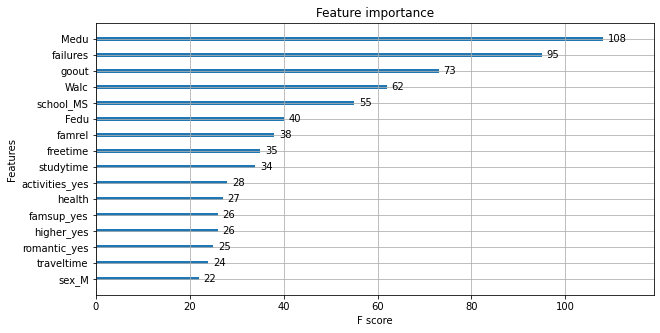

In [176]:
plot_importance(new_xgb)
plt.rcParams['figure.figsize']=(10,5)
plt.show()

AdaBoost

In [177]:
search_grid={'n_estimators':[10,20,30,40,50],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=AdaBoost,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=cv)

In [178]:
search.fit(Xreduce_train, yreduce_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [179]:
new_AdaBoost = search.best_estimator_

In [180]:
new_AdaBoost.fit(Xreduce_train,yreduce_train)
yreduce_pred = new_AdaBoost.predict(Xreduce_test)
# Calculating the accuracy
acc_AdaBoost_reduce = round( metrics.accuracy_score(yreduce_test, yreduce_pred) * 100 , 2 )
print( 'Accuracy of Adaboost model with feature selection : ', acc_AdaBoost_reduce )

Accuracy of Adaboost model with feature selection :  67.2


#Compare accuracy of all model

In [181]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Logistic regression','SVC','XGBClassifier','AdaBoostClassifier'],
    'Accuracy before tuning': [base_Decision_Tree,base_Logistic_Regression,base_SVC,base_XGBoost,base_AdaBoost],
    'Final Score': [acc_decision_tree, acc_logistic_regression,acc_svc ,acc_xgb,acc_AdaBoost],
    'With Feature selection' : [acc_decision_tree_reduce,acc_logistic_regression_reduce,acc_svc_reduce,acc_xgb_reduce,acc_AdaBoost_reduce]})
models.sort_values(by='Final Score', ascending=False)

,Model,Accuracy before tuning,Final Score,With Feature selection
4,AdaBoostClassifier,46.825397,73.81,67.20
3,XGBClassifier,71.428571,73.02,66.14
0,Decision Tree,49.206349,72.22,67.20
2,SVC,69.841270,70.63,67.20
1,Logistic regression,65.873016,69.84,69.31


In [182]:
# https://github.com/auriml/supervised_models/blob/master/student_intervention.ipynb